In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [5]:
df.shape

(319795, 18)

In [6]:
df.isnull().sum() 

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
(df.isnull().sum() / len(df) ) * 100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [11]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [12]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [13]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [15]:
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [16]:
df['Stroke'].value_counts()

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

In [17]:
df['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

In [18]:
df['Asthma'].value_counts()

Asthma
No     276923
Yes     42872
Name: count, dtype: int64

In [19]:
df['KidneyDisease'].value_counts()

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64

In [20]:
df['SkinCancer'].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns

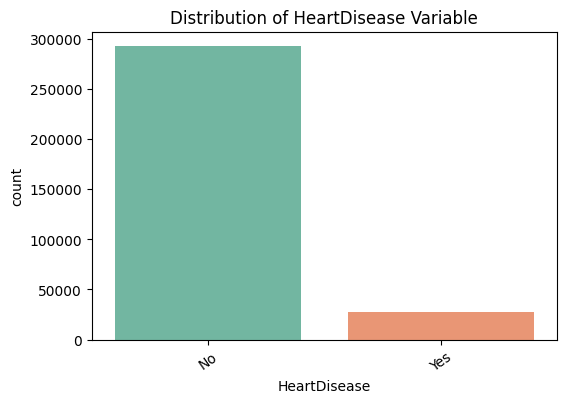

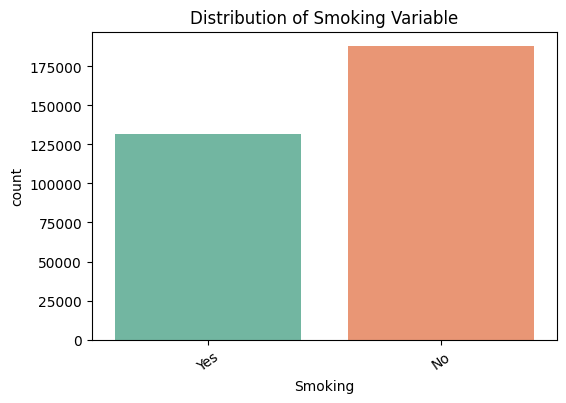

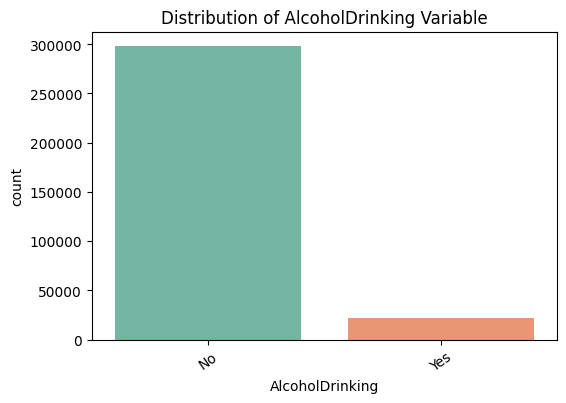

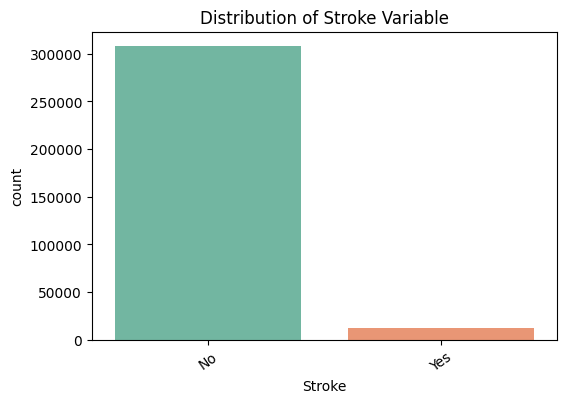

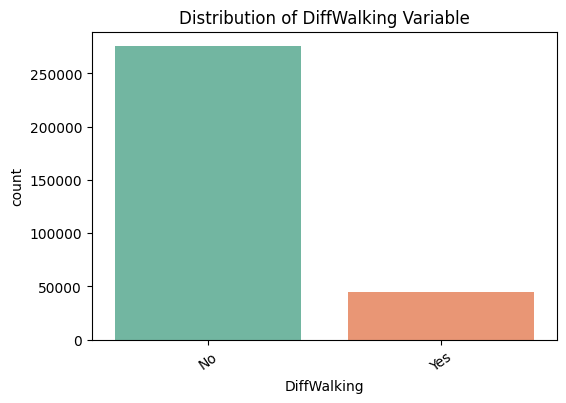

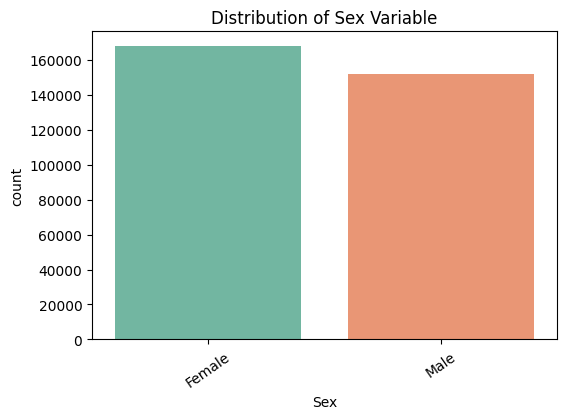

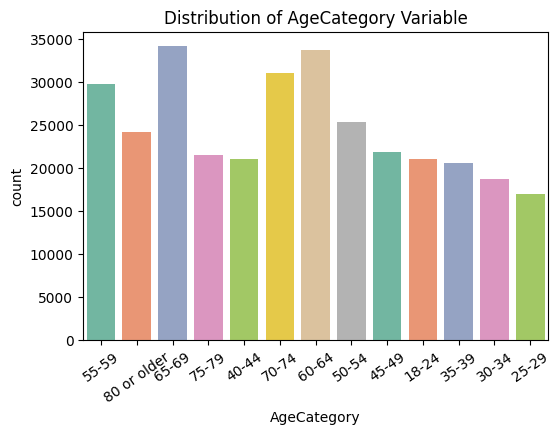

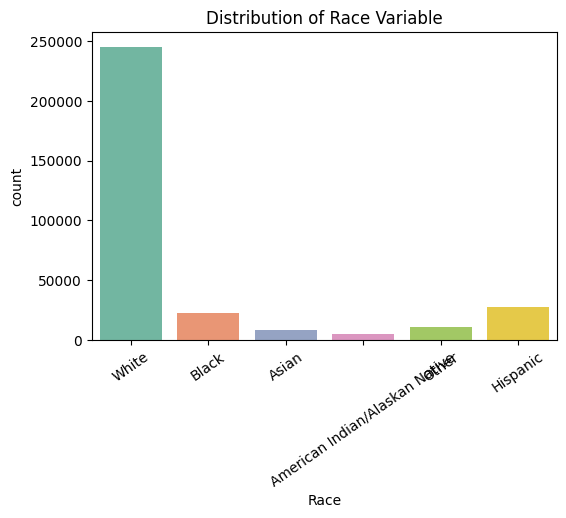

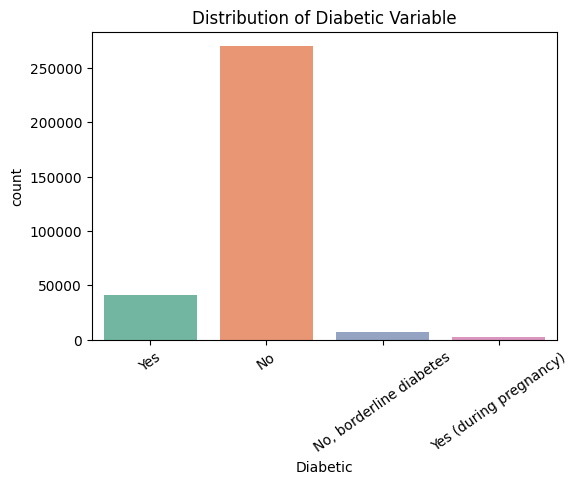

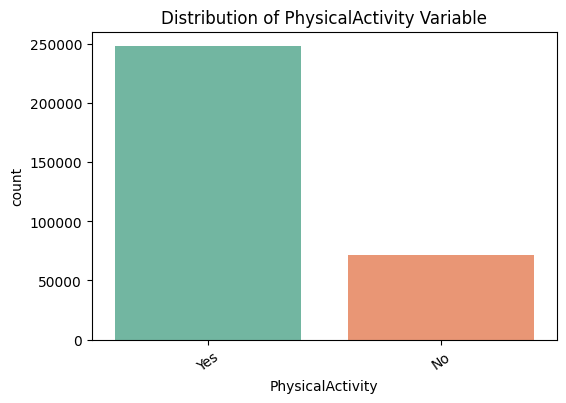

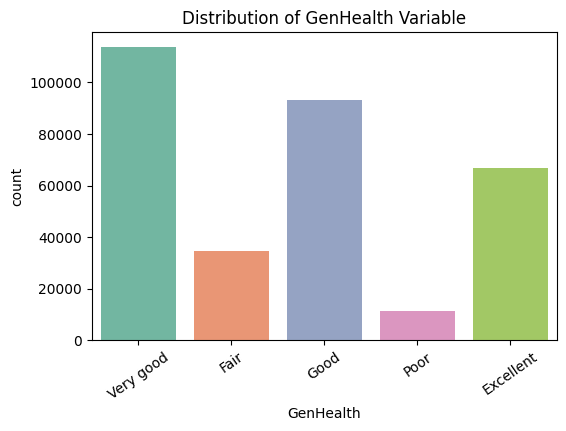

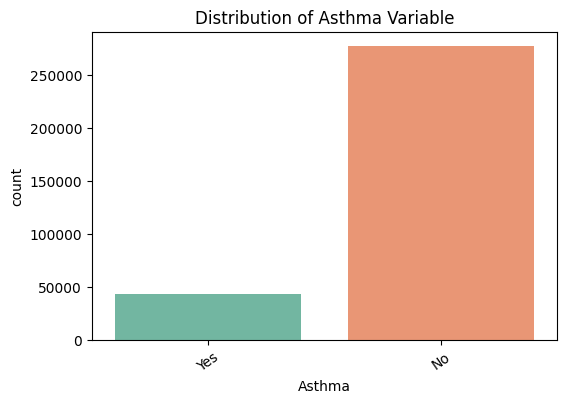

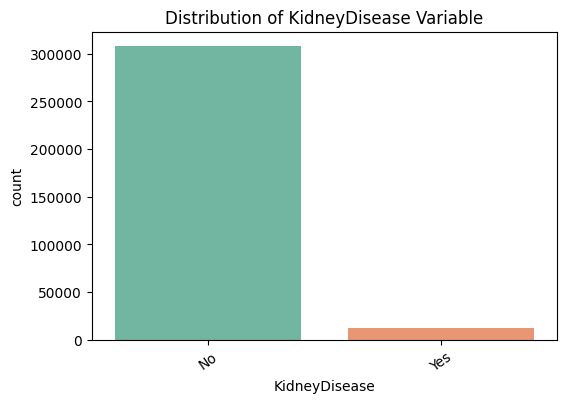

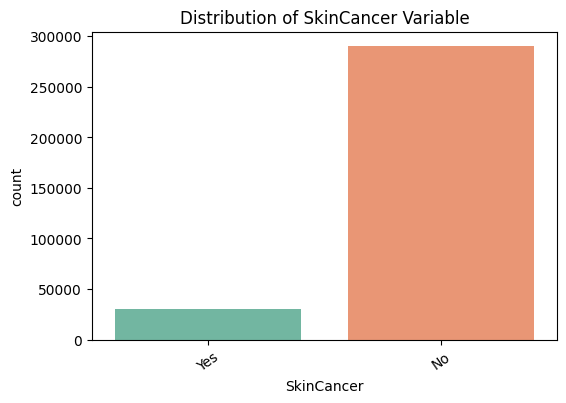

In [22]:
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f"Distribution of {column} Variable")
    plt.xticks(rotation=35)
    plt.show()

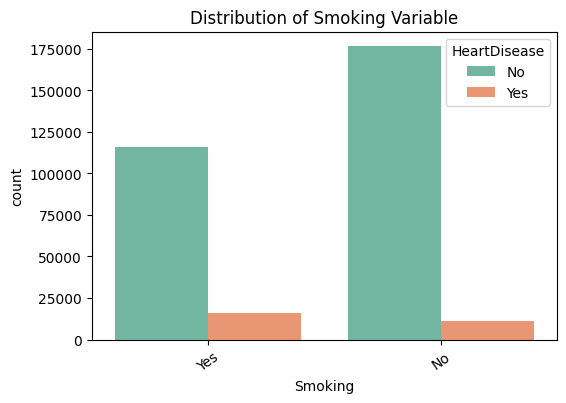

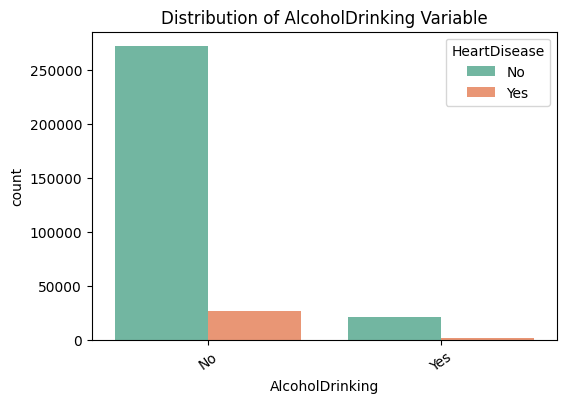

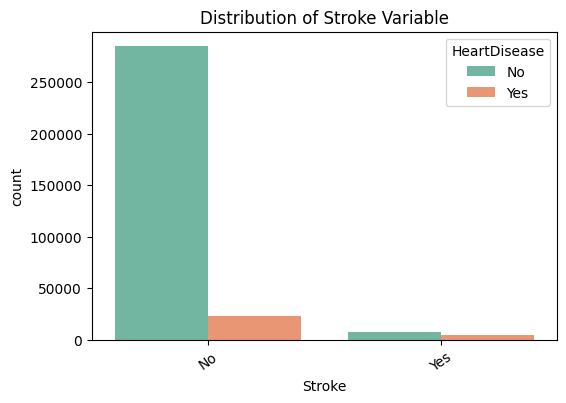

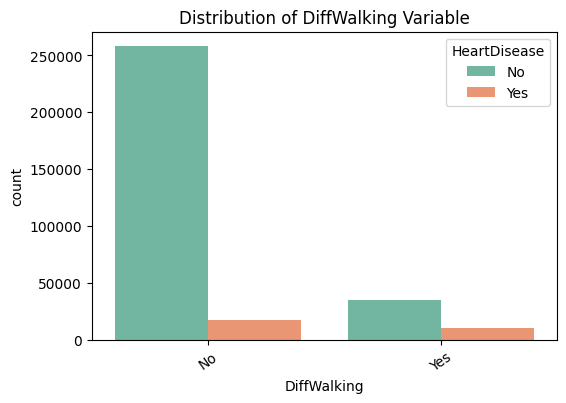

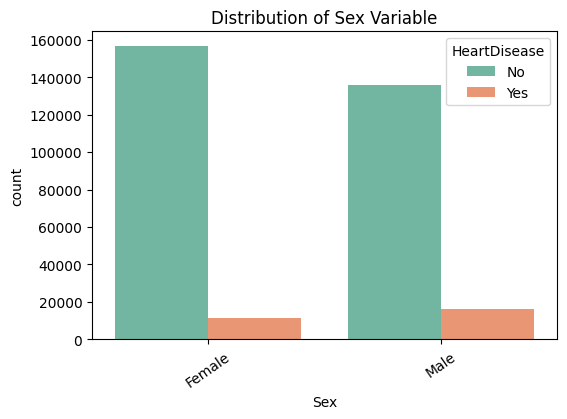

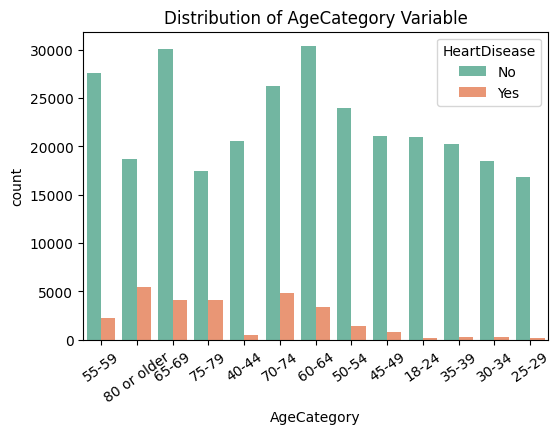

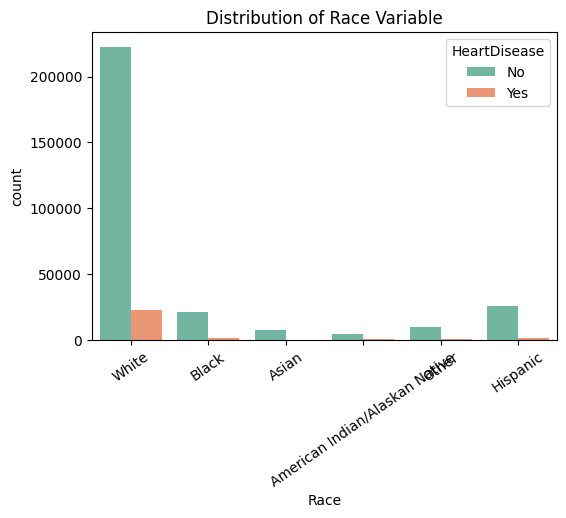

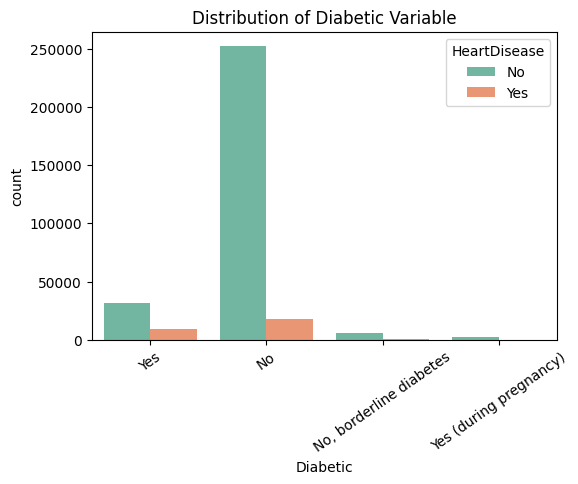

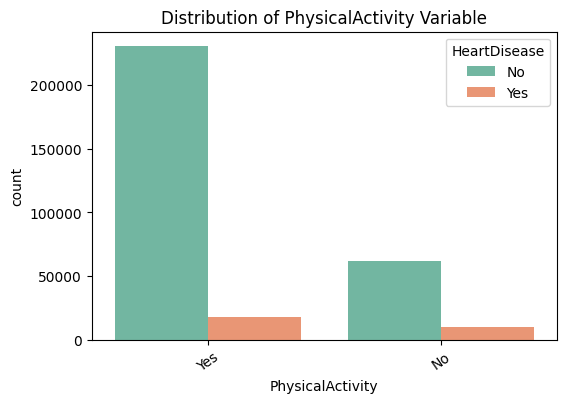

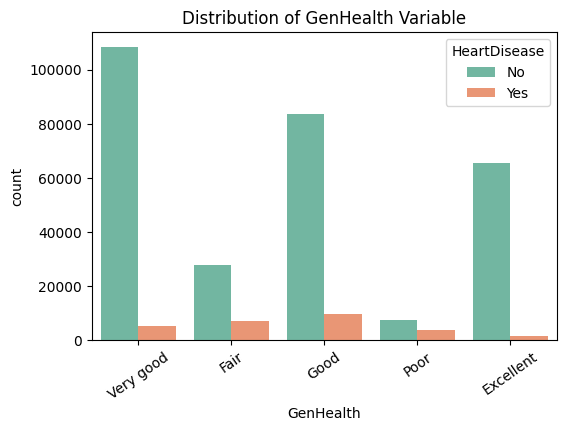

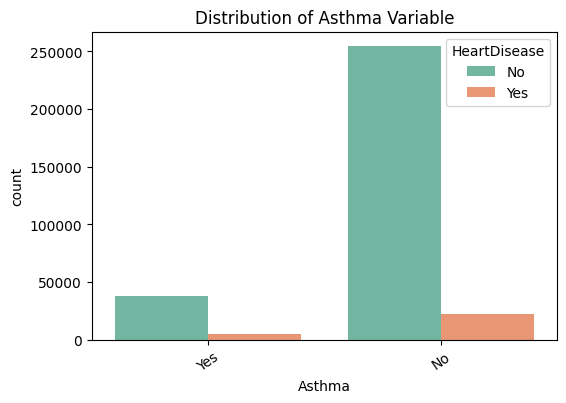

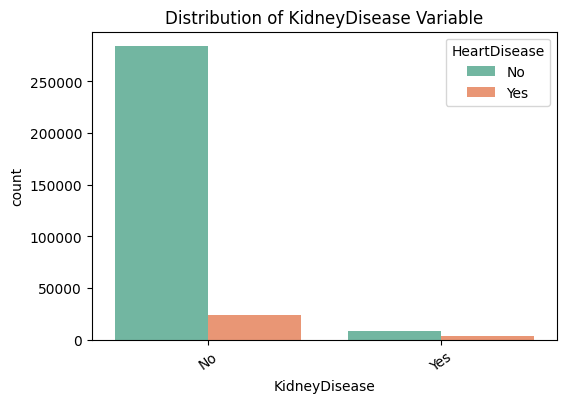

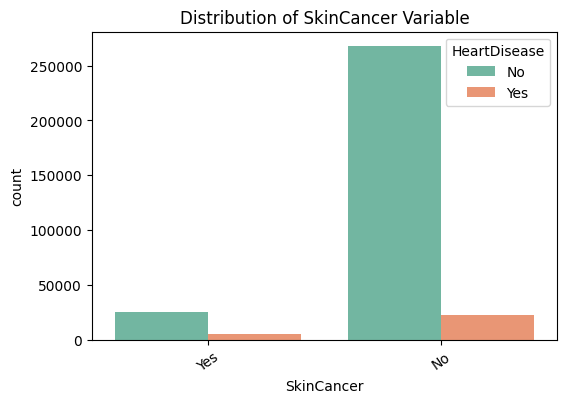

In [23]:
for column in categorical_columns:
    if column != 'HeartDisease':
        plt.figure(figsize=(6, 4))
        sns.countplot(x=column, data=df, hue = 'HeartDisease' ,palette='Set2')
        plt.title(f"Distribution of {column} Variable")
        plt.xticks(rotation=35)
        plt.show()

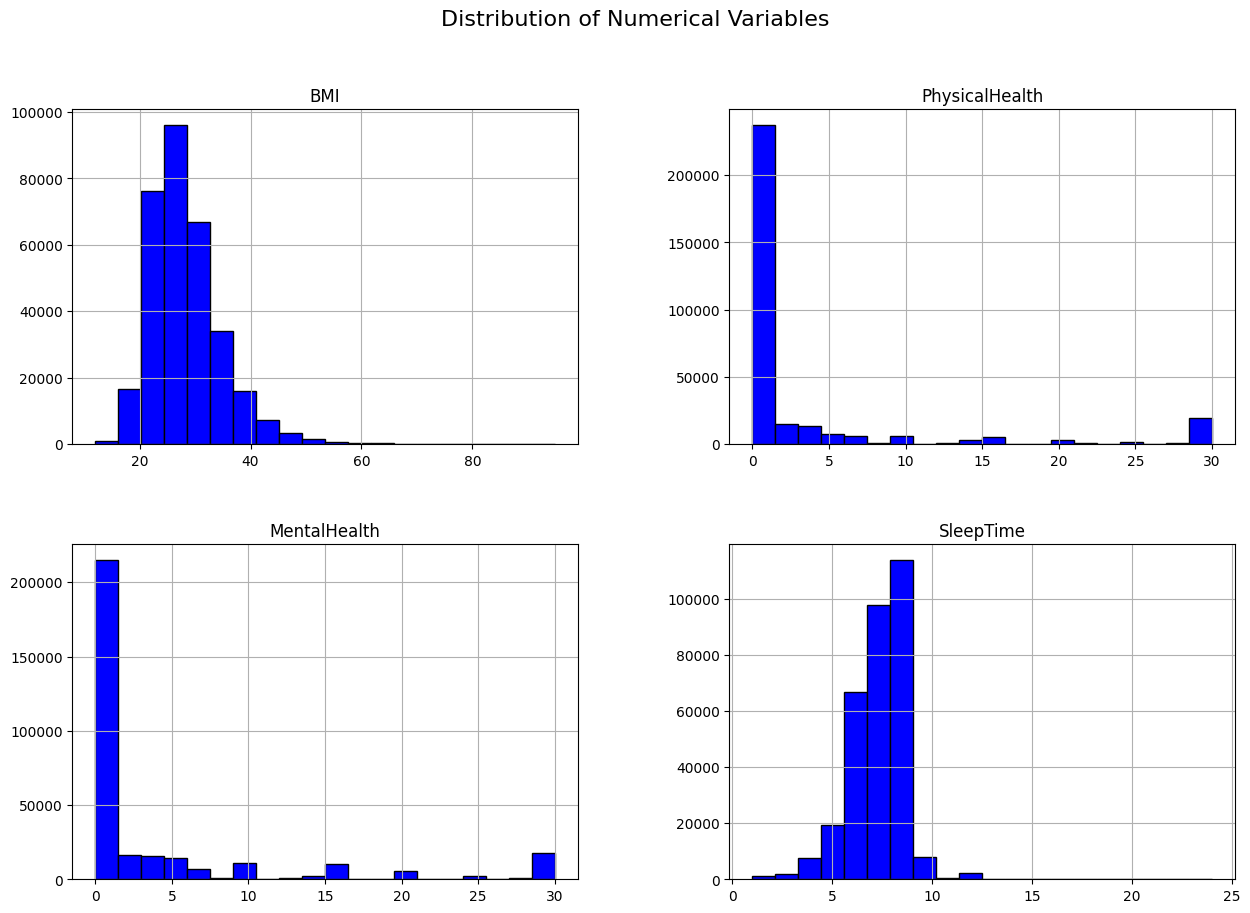

In [24]:
df.hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=16)
plt.show()

In [25]:
number_columns = df.select_dtypes(include=['float64']).columns

In [26]:
number_columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

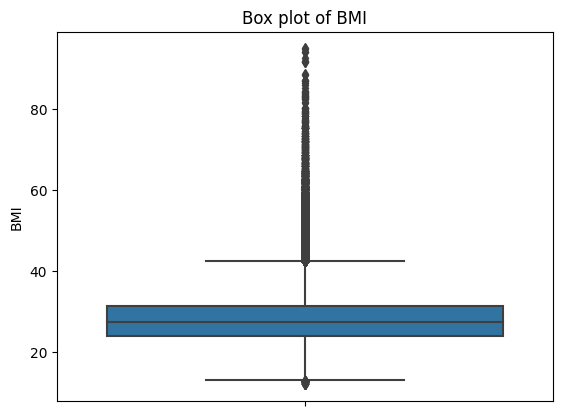

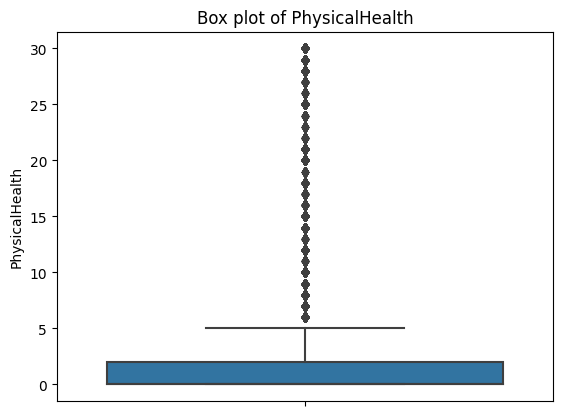

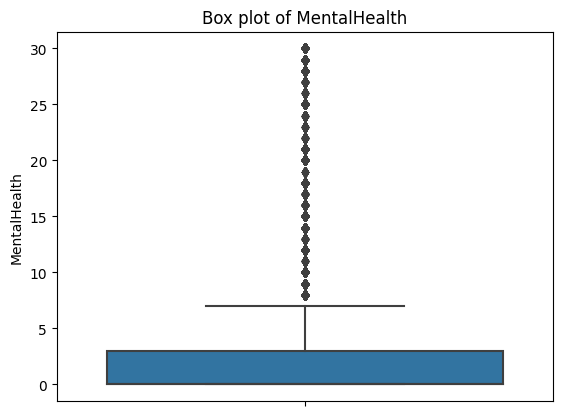

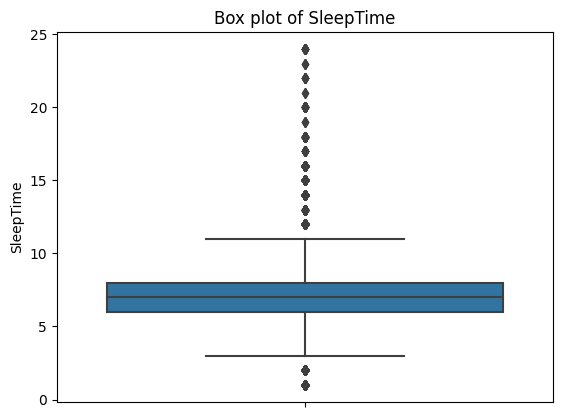

In [27]:
for column in number_columns:
    sns.boxplot(data = df , y = column )
    plt.title(f'Box plot of {column}')
    plt.show()

In [28]:
GenHealth_counts = df['GenHealth'].value_counts()
fig = px.bar(data_frame=df , x = GenHealth_counts.index , y = GenHealth_counts.values , title='Distribution of General Health')
fig.show()

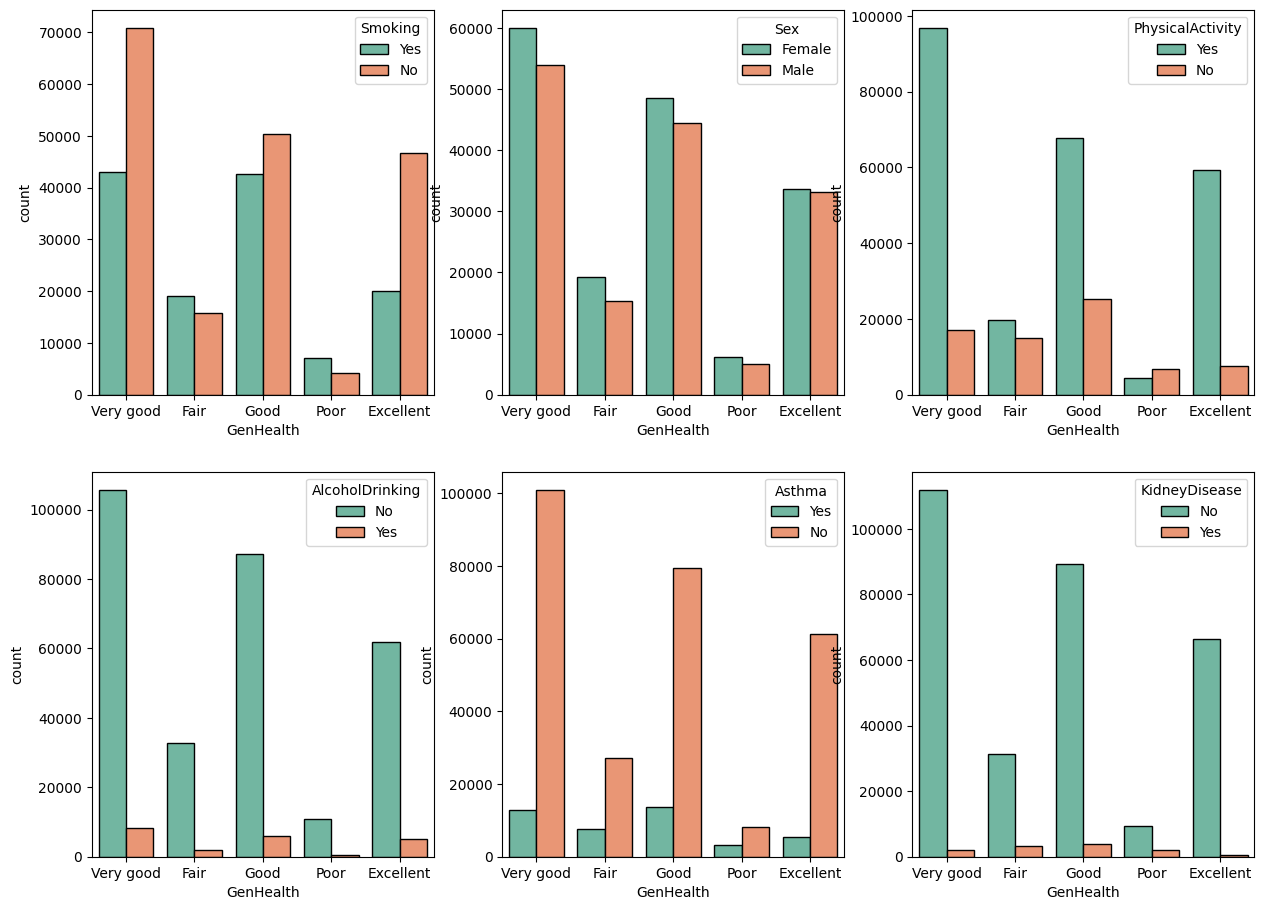

In [29]:
plt.figure(figsize=(15, 11))

plt.subplot(2 , 3 , 1)
sns.countplot(data = df ,x = 'GenHealth' , hue = 'Smoking' , palette='Set2' , edgecolor='black') 

plt.subplot(2 , 3 , 2)
sns.countplot(data = df , x = "GenHealth" , hue = 'Sex', palette='Set2' ,  edgecolor='black')

plt.subplot(2 , 3 , 3)
sns.countplot(data= df ,x = "GenHealth", hue="PhysicalActivity", palette="Set2" , edgecolor='black')

plt.subplot(2 , 3 , 4)
sns.countplot(data= df , x = "GenHealth", hue="AlcoholDrinking", palette="Set2", edgecolor='black')

plt.subplot(2 , 3 , 5)
sns.countplot(data= df , x = "GenHealth", hue="Asthma", palette="Set2", edgecolor='black')

plt.subplot(2 , 3 , 6)
sns.countplot(data= df , x = "GenHealth", hue="KidneyDisease", palette="Set2", edgecolor='black')

plt.show()

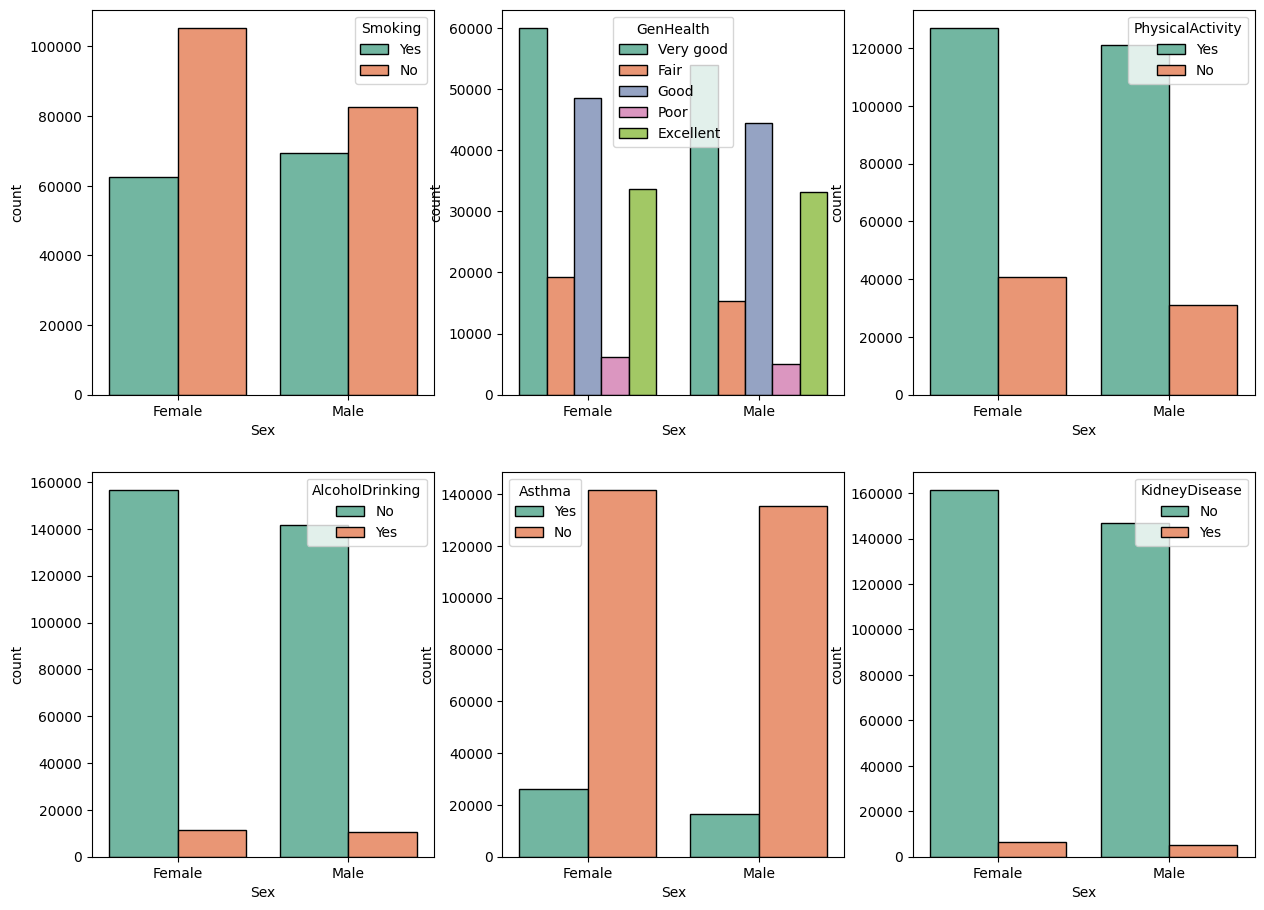

In [30]:
plt.figure(figsize=(15, 11))

plt.subplot(2 , 3 , 1)
sns.countplot(data = df ,x = 'Sex' , hue = 'Smoking' , palette='Set2' , edgecolor='black') 

plt.subplot(2 , 3 , 2)
sns.countplot(data = df , x = "Sex" , hue = 'GenHealth', palette='Set2' ,  edgecolor='black')

plt.subplot(2 , 3 , 3)
sns.countplot(data= df ,x = "Sex", hue="PhysicalActivity", palette="Set2" , edgecolor='black')

plt.subplot(2 , 3 , 4)
sns.countplot(data= df , x = "Sex", hue="AlcoholDrinking", palette="Set2", edgecolor='black')

plt.subplot(2 , 3 , 5)
sns.countplot(data= df , x = "Sex", hue="Asthma", palette="Set2", edgecolor='black')

plt.subplot(2 , 3 , 6)
sns.countplot(data= df , x = "Sex", hue="KidneyDisease", palette="Set2", edgecolor='black')

plt.show()

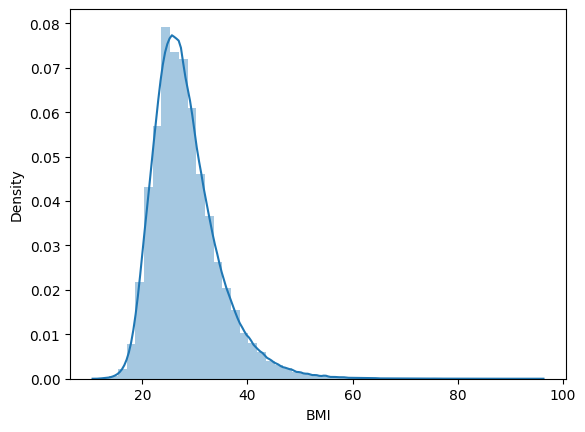

In [31]:
sns.distplot(df["BMI"])
plt.show()

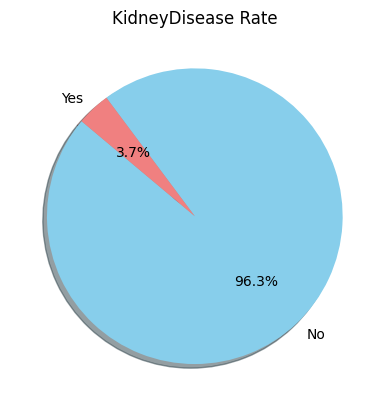

In [32]:
KidneyDisease_rate = df["KidneyDisease"].value_counts()
plt.pie(KidneyDisease_rate, labels=KidneyDisease_rate.index, 
        colors=['skyblue', 'lightcoral'], autopct="%1.1f%%", startangle=140, shadow=True)
plt.title("KidneyDisease Rate")
plt.show()

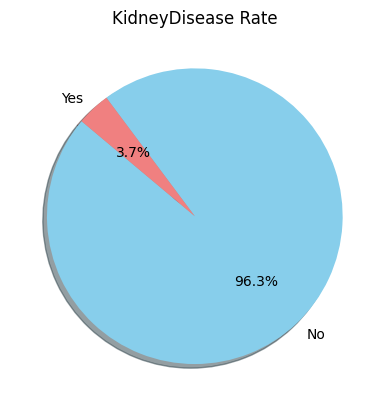

In [33]:
KidneyDisease_rate = df["KidneyDisease"].value_counts()
plt.pie(KidneyDisease_rate, labels=KidneyDisease_rate.index, 
        colors=['skyblue', 'lightcoral'], autopct="%1.1f%%", startangle=140, shadow=True)
plt.title("KidneyDisease Rate")
plt.show()